In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Read input data

wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Describe the data

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#Take info from the data

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


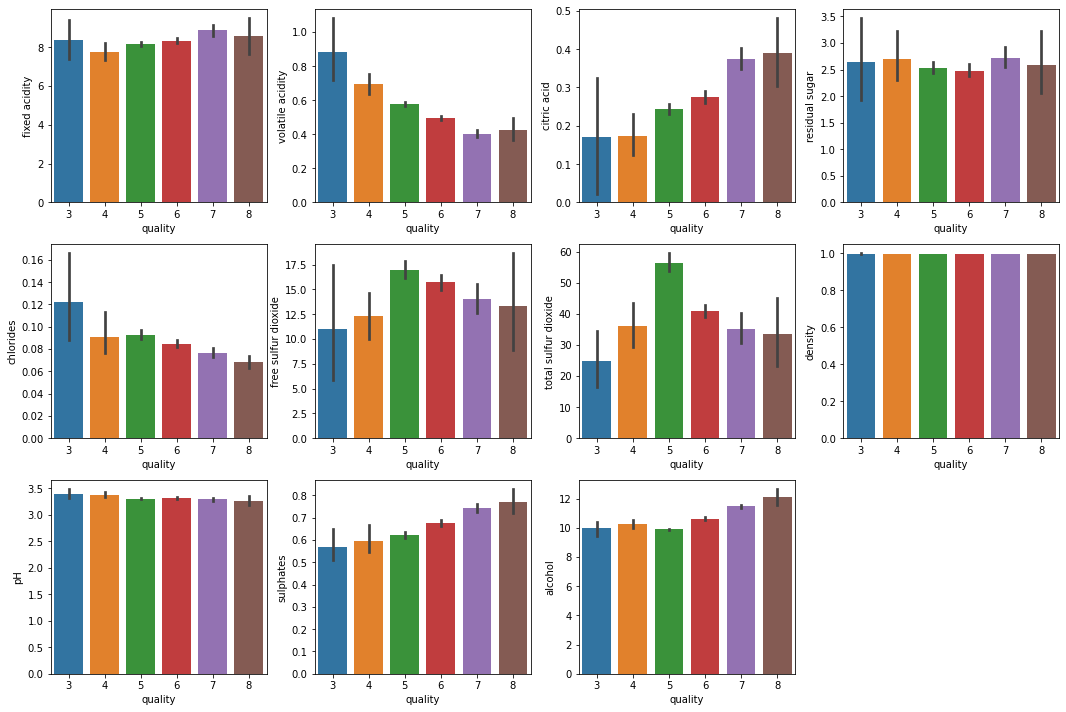

In [5]:
#Plotting out the data

fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

plt.subplot(3,4,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

plt.subplot(3,4,3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

plt.subplot(3,4,4)
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

plt.subplot(3,4,5)
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

plt.subplot(3,4,6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

plt.subplot(3,4,7)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

plt.subplot(3,4,8)
sns.barplot(x = 'quality', y = 'density', data = wine)

plt.subplot(3,4,9)
sns.barplot(x = 'quality', y = 'pH', data = wine)

plt.subplot(3,4,10)
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

plt.subplot(3,4,11)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

plt.tight_layout()

In [6]:
#from the plots above we can infer:

#Quality is high when volatile acidity is less.

#Quality is high when ctric acid is high.

#Quality is high when chlorides are less.

#Quality is high when suplhates are more.

#Quality is high when alcohol is more.

In [7]:
#Counting the number of instances in each quality class

wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#Make 2 categories GOOD and BAD. 
#ratings 3-6 = BAD and ratings 7-8 = GOOD

ranges = (2, 6.5, 8)
groups = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = ranges, labels = groups)

#Alloting 0 to BAD and 1 to GOOD
#fixed bug where I mispelled 'quality' to 'qulaity' in my transform line of code. This created a new column called 'qulaity'
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
#Check the counts

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [10]:
#Balance the two classes

good_quality = wine[wine['quality'] == 1]
bad_quality = wine[wine['quality'] == 0]

bad_quality = bad_quality.sample(frac = 1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality, bad_quality])
new_df = new_df.sample(frac = 1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,1
1286,7.1,0.160,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,0
1440,7.2,0.370,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,1
848,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,0
1071,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
520,9.8,0.250,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0,0
1464,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,0
929,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,1
1098,8.0,0.310,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,1


In [12]:
#This step makes a new data frame for only good quality wine
#This step also makes a new data frame for only bad quality wine

#Then we shuffle bad quality data using df.sample(frac=1) - it means to shuffle the data and take a 100% fraction of the data
#Then we take out of 217 samples of bad_quaility because we only have 217 samples of good quality.

#Then we join both samples of each class to make a final data frame of 217*2=434 rows.
#finally shuffle the data again. 

In [13]:
#Check the value counts to make sure data frame as equal number of good and bad quality wines.
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [15]:
#Checking the correlation between columns.

new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.509291
sulphates               0.346964
citric acid             0.249118
residual sugar          0.100552
fixed acidity           0.095178
pH                     -0.024820
free sulfur dioxide    -0.061407
total sulfur dioxide   -0.167675
chlorides              -0.193185
density                -0.213910
volatile acidity       -0.361796
Name: quality, dtype: float64

In [16]:
#from this information we can infer that quality is highly dependeent on tthe alcohol quantity in the wine.

In [18]:
#Split the data in train and test

from sklearn.model_selection import train_test_split

X = new_df.drop('quality', axis=1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [20]:
#Training our Wine Quality Prediction Model

param = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

grid_rf = GridSearchCV(RandomForestClassifier(), param, scoring='accuracy', cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

#Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

Best parameters -->  {'n_estimators': 800}
[[52 17]
 [ 9 53]]


              precision    recall  f1-score   support

           0       0.85      0.75      0.80        69
           1       0.76      0.85      0.80        62

    accuracy                           0.80       131
   macro avg       0.80      0.80      0.80       131
weighted avg       0.81      0.80      0.80       131



0.8015267175572519
